In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# On Met les ventes par canal sur 1 ligne

In [127]:
df = pd.read_csv('ventes_luxe_détaillées.csv', sep=';')

df['Jour'] = df['Date'].apply(lambda x: x.split('-')[2])

df["Date"] = pd.to_datetime(df["Date"])

df_pivot = df.pivot_table(index=['Date', 'Catégorie_Produit', 'Événement_Spécial', 'Mois', 'Année', 'Jour'],
                          columns='Canal_Vente', values='Montant_Ventes').reset_index()

# On pivote les colonnes
df_pivot.columns = ['Date', 'Catégorie_Produit', 'Événement_Spécial', 'Mois', 'Année', 'Jour'] + \
                   ['Montant_Ventes_' + canal.replace(' ', '_') for canal in df_pivot.columns[6:]]

df_pivot.fillna(0, inplace=True)

# Convert de float a int
montant_cols = [col for col in df_pivot.columns if col.startswith('Montant_Ventes')]
df_pivot[montant_cols] = df_pivot[montant_cols].astype(int)

df_pivot['Mois'] = df_pivot['Mois'].apply(lambda x: f"{x:02}")

# Calculer le jour de la semaine en prenant comme référence que '2018-01-01' est un lundi

df = df_pivot

df['Jour_Semaine'] = (df['Date'] - pd.Timestamp('2018-01-01')).dt.days % 7 + 1

df["Montant_Ventes_Totales"] = df["Montant_Ventes_Boutique_Physique"] + df["Montant_Ventes_En_ligne"] + df["Montant_Ventes_Grands_Magasins"] + df["Montant_Ventes_Ventes_Privées"]

df

,Date,Catégorie_Produit,Événement_Spécial,Mois,Année,Jour,Montant_Ventes_Boutique_Physique,Montant_Ventes_En_ligne,Montant_Ventes_Grands_Magasins,Montant_Ventes_Ventes_Privées,Jour_Semaine,Montant_Ventes_Totales
0,2018-01-01,Accessoires,0,01,2018,01,1123,1123,1238,1332,1,4816
1,2018-01-01,Joaillerie,0,01,2018,01,930,1178,1085,952,1,4145
2,2018-01-01,Maroquinerie,0,01,2018,01,1124,1319,986,1158,1,4587
3,2018-01-01,Mode,0,01,2018,01,1134,1207,1325,1224,1,4890
4,2018-01-01,Montres,0,01,2018,01,1186,1034,988,1046,1,4254
...,...,...,...,...,...,...,...,...,...,...,...,...
10951,2022-12-31,Joaillerie,1,12,2022,31,1430,1153,1443,1223,6,5249
10952,2022-12-31,Maroquinerie,1,12,2022,31,1669,1680,1735,1269,6,6353
10953,2022-12-31,Mode,1,12,2022,31,1662,1737,1685,1494,6,6578
10954,2022-12-31,Montres,1,12,2022,31,1697,1294,1645,1376,6,6012


In [145]:
# Grouper les données par mois et année et calculer la somme des ventes
df_monthly_sales = df.groupby(['Année', 'Mois'])['Montant_Ventes_Totales'].mean().reset_index()


# Evolution des ventes par mois et année

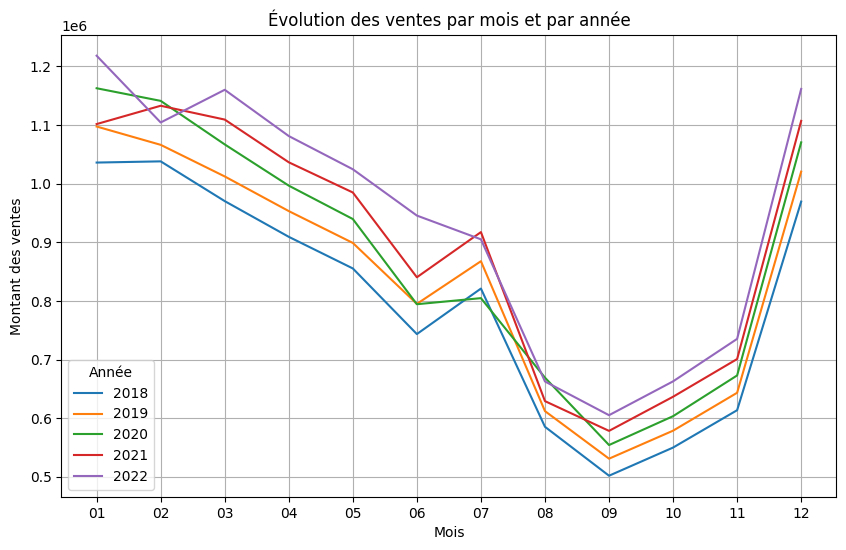

In [119]:
# Créer le graphique
plt.figure(figsize=(10, 6))
for year in df_monthly_sales['Année'].unique():
    data = df_monthly_sales[df_monthly_sales['Année'] == year]
    plt.plot(data['Mois'], data['Montant_Ventes_Totales'], label=str(year))

plt.title("Évolution des ventes par mois et par année")
plt.xlabel("Mois")
plt.ylabel("Montant des ventes")
plt.legend(title="Année")
plt.grid(True)
plt.show()

In [ ]:

# Chargement des données depuis le fichier CSV
df = pd.read_csv('ventes_luxe_détaillées.csv', sep=';')

# Calcul de la somme des ventes par catégorie de produit
df_category_sales = df.groupby('Catégorie_Produit')['Montant_Ventes'].sum()

# Création du graphique circulaire
plt.figure(figsize=(10, 8))
plt.pie(df_category_sales, labels=df_category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des ventes par catégorie de produit")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'votre_fichier.csv'

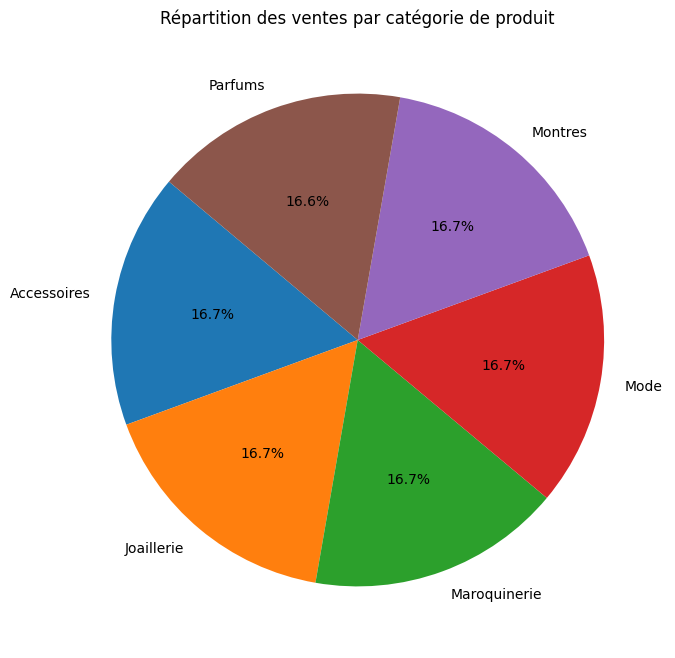

In [120]:
# Calcul de la répartition des ventes par catégorie de produit
sales_by_category = df.groupby('Catégorie_Produit')['Montant_Ventes_Totales'].sum()

# Création du diagramme en secteurs
plt.figure(figsize=(8, 8))
sales_by_category.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Répartition des ventes par catégorie de produit")
plt.ylabel("")  # Cache l'étiquette de l'axe y
plt.show()

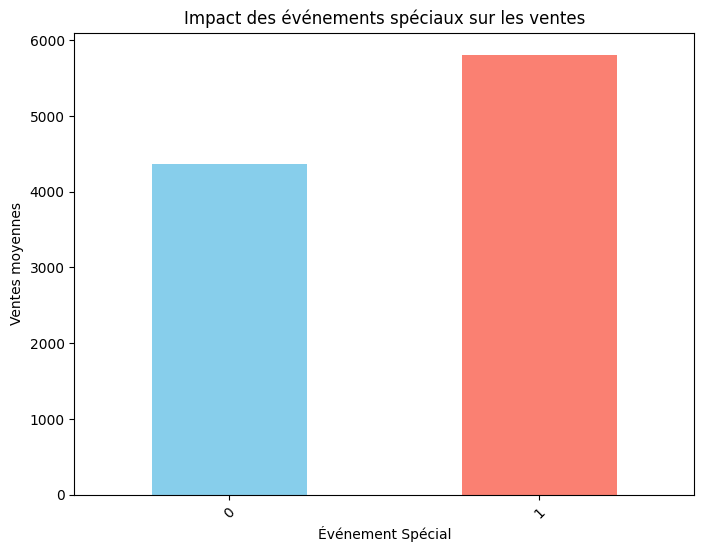

In [121]:
# Calcul des ventes moyennes avec et sans événements spéciaux
df_special_event = df.groupby('Événement_Spécial')['Montant_Ventes_Totales'].mean()

# Création du graphique en barres
plt.figure(figsize=(8, 6))
df_special_event.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Impact des événements spéciaux sur les ventes")
plt.xlabel("Événement Spécial")
plt.ylabel("Ventes moyennes")
plt.xticks(rotation=45)
plt.show()

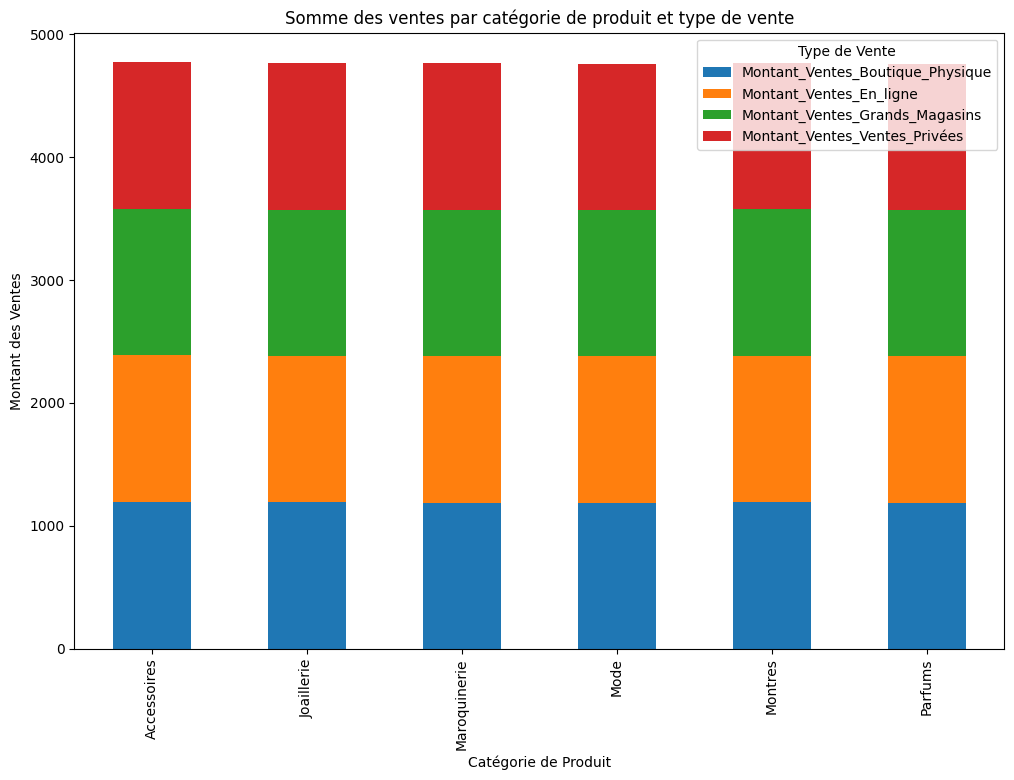

In [146]:
# Calcul des ventes par canal de vente
df_somme = df.groupby('Catégorie_Produit').mean(numeric_only=True)[[
    'Montant_Ventes_Boutique_Physique',
    'Montant_Ventes_En_ligne',
    'Montant_Ventes_Grands_Magasins',
    'Montant_Ventes_Ventes_Privées'
]]

# Créer le graphique en barres
df_somme.plot(kind='bar', stacked=True, figsize=(12, 8))

# Ajouter un titre et des labels aux axes
plt.title("Somme des ventes par catégorie de produit et type de vente")
plt.xlabel("Catégorie de Produit")
plt.ylabel("Montant des Ventes")

# Afficher la légende et le graphique
plt.legend(title="Type de Vente")
plt.show()

In [147]:
# Grouper par année, mois, et catégorie de produit pour calculer la somme des ventes
df_category_sales = df.groupby([ 'Mois', 'Catégorie_Produit'])['Montant_Ventes_Totales'].mean().reset_index()

df_category_sales

,Mois,Catégorie_Produit,Montant_Ventes_Totales
0,01,Accessoires,6041.664516
1,01,Joaillerie,6038.929032
2,01,Maroquinerie,6033.967742
3,01,Mode,6025.290323
4,01,Montres,6069.580645
...,...,...,...
67,12,Joaillerie,5796.045161
68,12,Maroquinerie,5695.929032
69,12,Mode,5729.438710
70,12,Montres,5685.045161


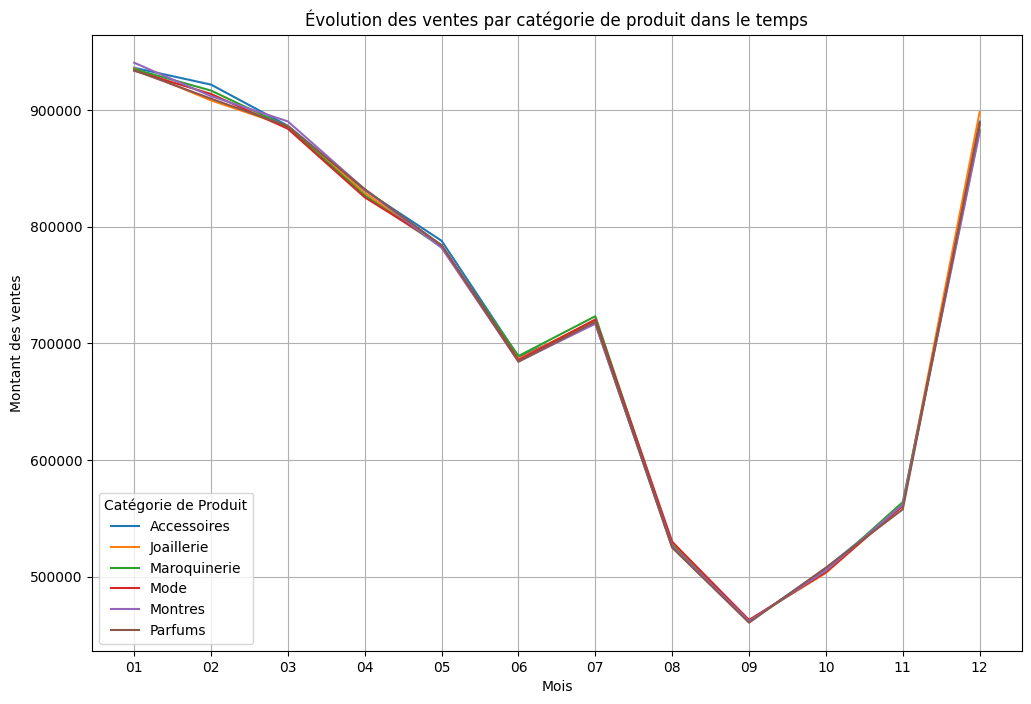

In [124]:
# Création du graphique en lignes multiples
plt.figure(figsize=(12, 8))
for category in df_category_sales['Catégorie_Produit'].unique():
    data = df_category_sales[df_category_sales['Catégorie_Produit'] == category]
    plt.plot(data['Mois'], data['Montant_Ventes_Totales'], label=category)

plt.title("Évolution des ventes par catégorie de produit dans le temps")
plt.xlabel("Mois")
plt.ylabel("Montant des ventes")
plt.legend(title="Catégorie de Produit")
plt.grid(True)
plt.show()

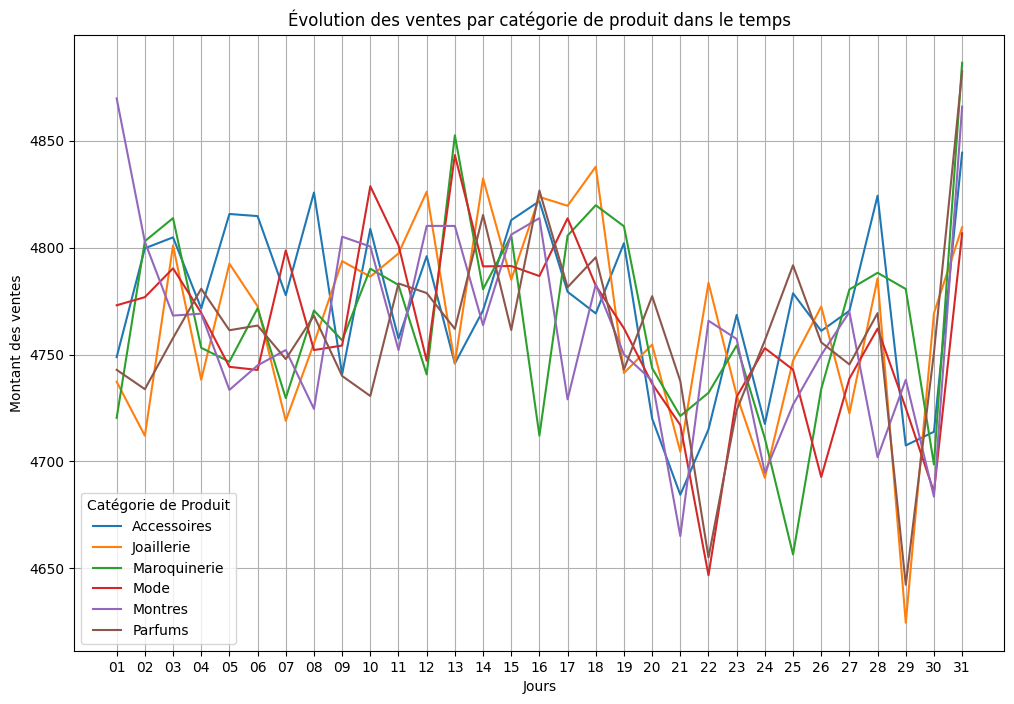

In [149]:
# Grouper par année, mois, et catégorie de produit pour calculer la somme des ventes
df_category_sales = df.groupby([ 'Jour', 'Catégorie_Produit'])['Montant_Ventes_Totales'].mean().reset_index()

df_category_sales


# Création du graphique en lignes multiples
plt.figure(figsize=(12, 8))
for category in df_category_sales['Catégorie_Produit'].unique():
    data = df_category_sales[df_category_sales['Catégorie_Produit'] == category]
    plt.plot(data['Jour'], data['Montant_Ventes_Totales'], label=category)

plt.title("Évolution des ventes par catégorie de produit dans le temps")
plt.xlabel("Jours")
plt.ylabel("Montant des ventes")
plt.legend(title="Catégorie de Produit")
plt.grid(True)
plt.show()

    On remarque une grosse chute de vente le 31, dû à la longueur des mois. 
    Par contre, on remarque également une chute des ventes les 30 du mois, peut-être s'agit-il d'un jour fermé pour les comptes du magasin ?

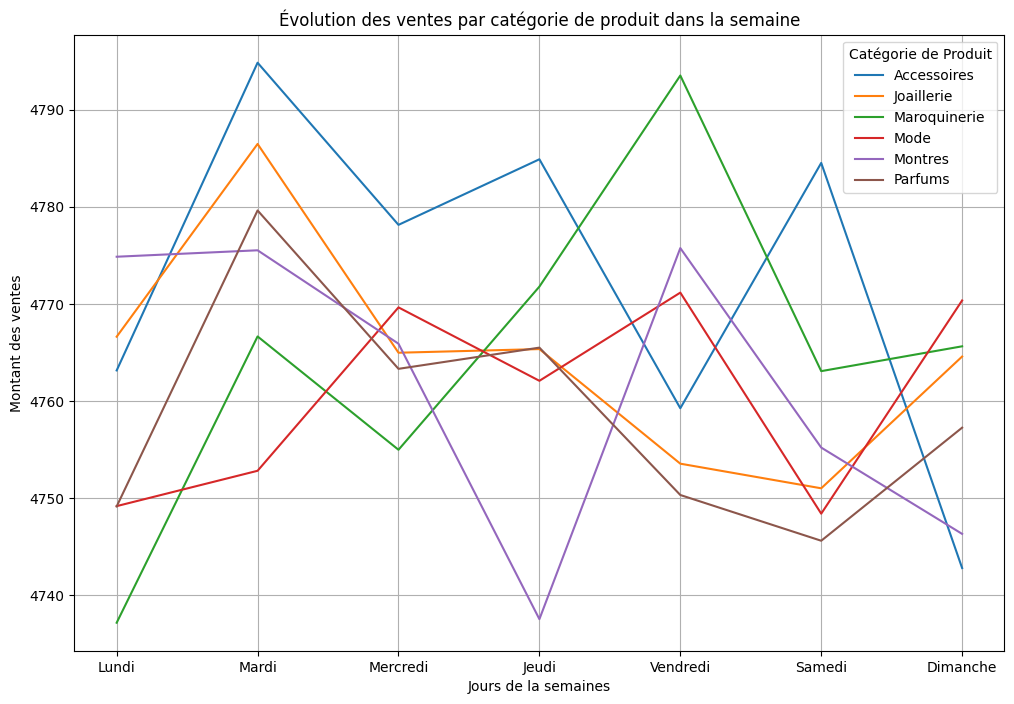

In [134]:
# Grouper par année, mois, et catégorie de produit pour calculer la somme des ventes
df_category_sales = df.groupby([ 'Jour_Semaine', 'Catégorie_Produit'])['Montant_Ventes_Totales'].mean().reset_index()

df_category_sales


# Création du graphique en lignes multiples
plt.figure(figsize=(12, 8))
for category in df_category_sales['Catégorie_Produit'].unique():
    data = df_category_sales[df_category_sales['Catégorie_Produit'] == category]
    plt.plot(data['Jour_Semaine'], data['Montant_Ventes_Totales'], label=category)

plt.title("Évolution des ventes par catégorie de produit dans la semaine")
plt.xlabel("Jours de la semaines")
plt.ylabel("Montant des ventes")

# Personnaliser les ticks de l'axe x avec les noms des jours
jours_semaine = {1: 'Lundi', 2: 'Mardi', 3: 'Mercredi', 4: 'Jeudi', 5: 'Vendredi', 6: 'Samedi', 7: 'Dimanche'}


# plt.xticks(ticks=range(1, 8), labels=df_category_sales['Jour_Semaine'].map(jours_semaine).unique())
plt.xticks(ticks=range(1, 8), labels=[jours_semaine[j] for j in range(1, 8)])

plt.legend(title="Catégorie de Produit")
plt.grid(True)
plt.show()

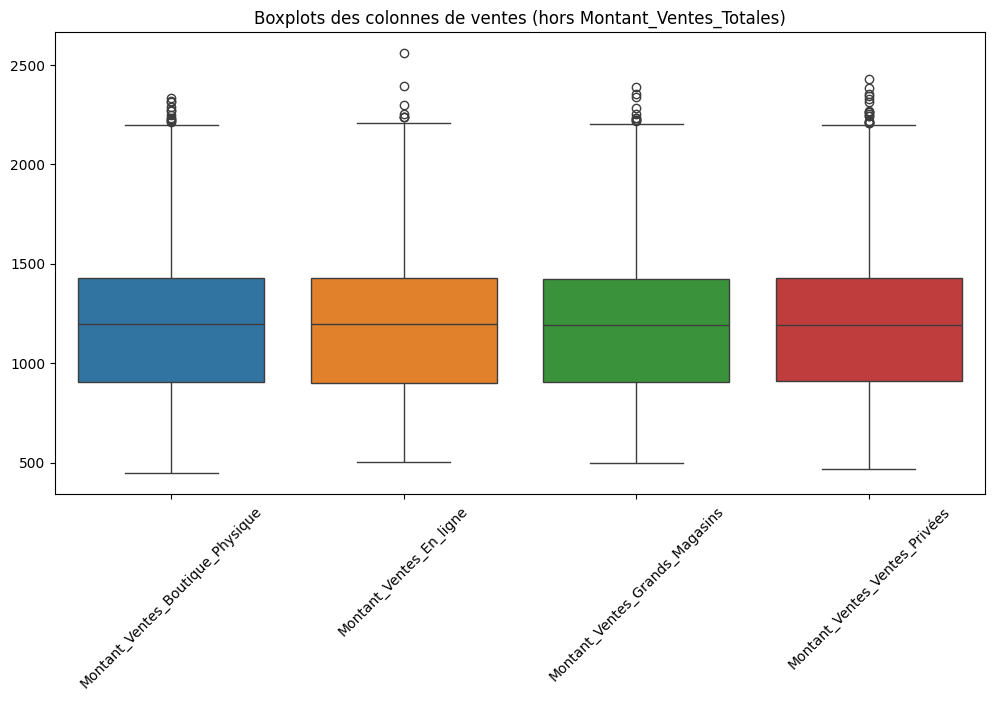

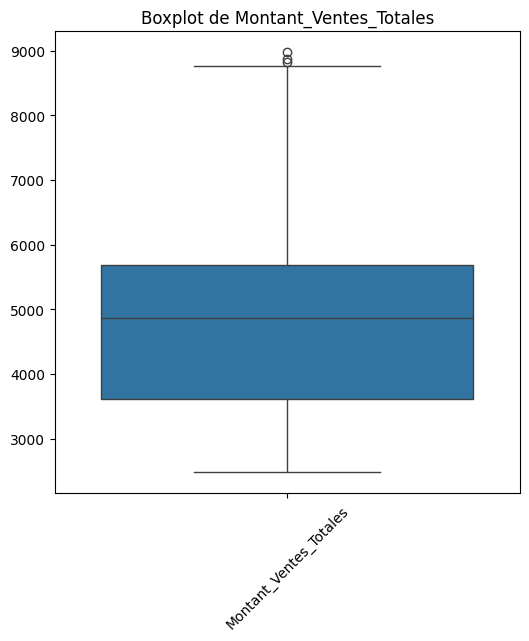

In [ ]:
numeric_columns = df.select_dtypes(include='number').drop(columns=['Jour_Semaine', 'Année', 'Événement_Spécial'])

# Séparer Montant_Ventes_Totales des autres montants de ventes
vente_totale = numeric_columns[['Montant_Ventes_Totales']]
autres_ventes = numeric_columns.drop(columns=['Montant_Ventes_Totales'])

# Création du boxplot pour les colonnes de ventes spécifiques
plt.figure(figsize=(12, 6))
sns.boxplot(data=autres_ventes)
plt.title("Boxplots des colonnes de ventes (hors Montant_Ventes_Totales)")
plt.xticks(rotation=45)
plt.show()


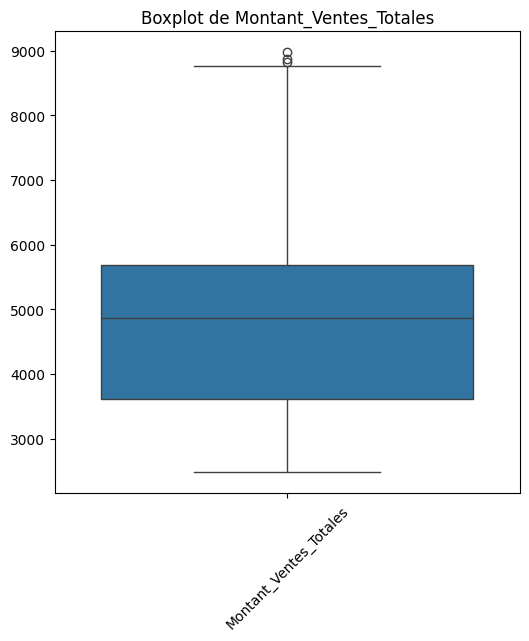

In [142]:

# Création du boxplot pour Montant_Ventes_Totales
plt.figure(figsize=(6, 6))
sns.boxplot(data=vente_totale)
plt.title("Boxplot de Montant_Ventes_Totales")
plt.xticks(rotation=45)
plt.show()

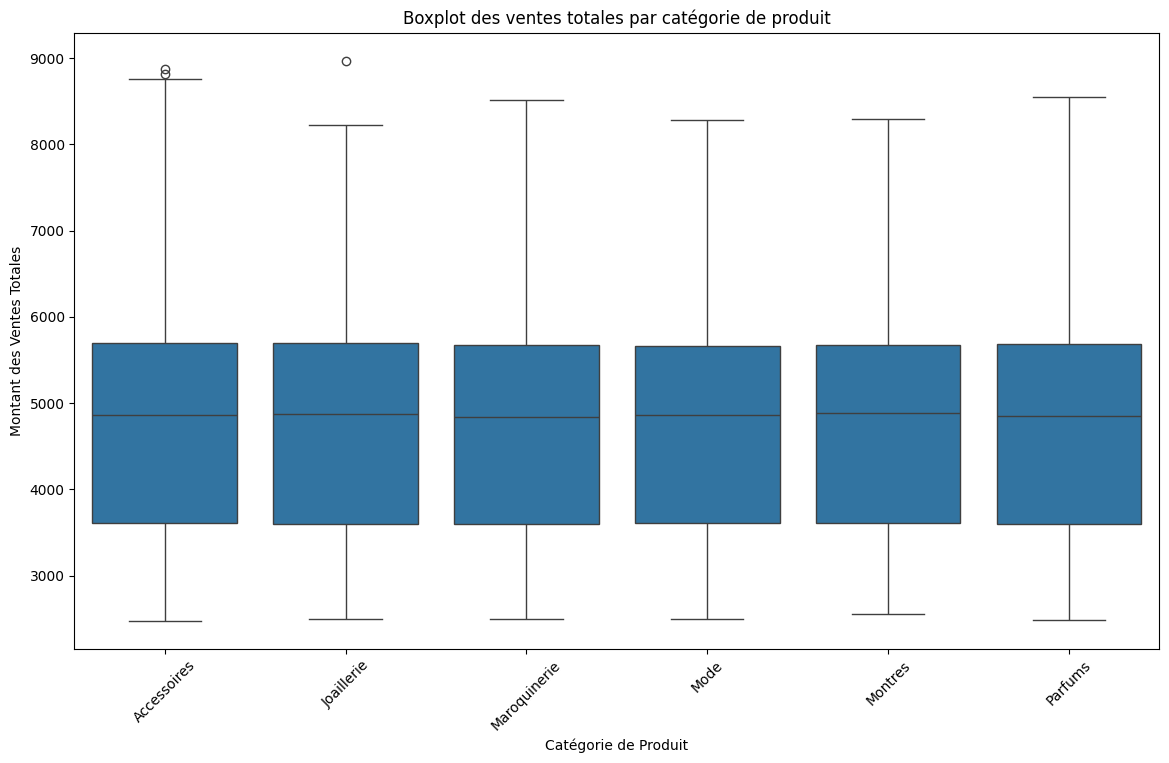

In [143]:
# Créer le boxplot des montants de ventes totales par catégorie de produit
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Catégorie_Produit', y='Montant_Ventes_Totales')

# Ajouter un titre et les labels des axes
plt.title("Boxplot des ventes totales par catégorie de produit")
plt.xlabel("Catégorie de Produit")
plt.ylabel("Montant des Ventes Totales")
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()